In [90]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 

In [91]:
titanc_data = pd.read_csv('train.csv')

In [92]:
titanc_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [93]:
titanc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
titanc_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [95]:
titanc_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:

import category_encoders as ce
tenc=ce.TargetEncoder() 

In [97]:
titanc_data['cabin_en']=tenc.fit_transform(titanc_data['Cabin'],titanc_data['Survived'])
titanc_data.drop(columns=['Cabin'], inplace=True)

In [98]:
titanc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  cabin_en     891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [99]:
titanc_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_en
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.299854
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.464006
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.299854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.400316
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.299854
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.299854
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0.464006
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0.299854
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0.464006


In [100]:
titanc_data2 = titanc_data

In [101]:
titanc_data2['age_fill'] = titanc_data2['Age'].fillna(titanc_data2['Age'].median())

In [102]:
titanc_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [103]:
titanc_data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_en,age_fill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.299854,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.464006,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.299854,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.400316,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.299854,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.299854,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0.464006,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0.299854,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0.464006,26.0


In [104]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanc_data2['sex_encoded'] = encoder.fit_transform(titanc_data2['Sex'])

In [105]:
titanc_data2 = titanc_data.drop(columns=['Name','Ticket','Embarked','PassengerId'])

In [106]:
titanc_data3 =titanc_data2

In [107]:
titanc_data3 = titanc_data2.drop(columns=['Sex','Age'])
titanc_data3

,Survived,Pclass,SibSp,Parch,Fare,cabin_en,age_fill,sex_encoded
0,0,3,1,0,7.2500,0.299854,22.0,1
1,1,1,1,0,71.2833,0.464006,38.0,0
2,1,3,0,0,7.9250,0.299854,26.0,0
3,1,1,1,0,53.1000,0.400316,35.0,0
4,0,3,0,0,8.0500,0.299854,35.0,1
...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,0.299854,27.0,1
887,1,1,0,0,30.0000,0.464006,19.0,0
888,0,3,1,2,23.4500,0.299854,28.0,0
889,1,1,0,0,30.0000,0.464006,26.0,1


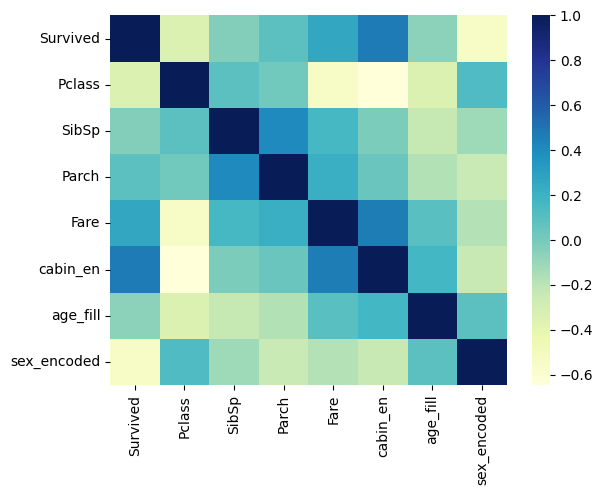

In [108]:
sns.heatmap(titanc_data3.corr(), cmap="YlGnBu")
plt.show()

In [109]:
titanc_data3.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [110]:
from sklearn.model_selection import StratifiedShuffleSplit

split =StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for trian_indsce , test_indsce in split.split(titanc_data3,titanc_data3[['Survived','Pclass','sex_encoded']]):
    train_set= titanc_data3.loc[trian_indsce]
    test_set= titanc_data3.loc[test_indsce]

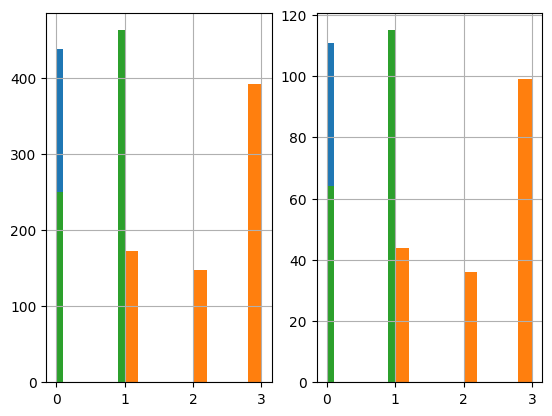

In [111]:
plt.subplot(1,2,1)
train_set['Survived'].hist()
train_set['Pclass'].hist()
train_set['sex_encoded'].hist()

plt.subplot(1,2,2)
test_set['Survived'].hist()
test_set['Pclass'].hist()
test_set['sex_encoded'].hist()

plt.show()

In [112]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 385 to 695
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   SibSp        712 non-null    int64  
 3   Parch        712 non-null    int64  
 4   Fare         712 non-null    float64
 5   cabin_en     712 non-null    float64
 6   age_fill     712 non-null    float64
 7   sex_encoded  712 non-null    int32  
dtypes: float64(3), int32(1), int64(4)
memory usage: 47.3 KB


In [113]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 787 to 631
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     179 non-null    int64  
 1   Pclass       179 non-null    int64  
 2   SibSp        179 non-null    int64  
 3   Parch        179 non-null    int64  
 4   Fare         179 non-null    float64
 5   cabin_en     179 non-null    float64
 6   age_fill     179 non-null    float64
 7   sex_encoded  179 non-null    int32  
dtypes: float64(3), int32(1), int64(4)
memory usage: 11.9 KB


In [114]:
x_trian =train_set.iloc[:,1:]
y_trian = train_set.iloc[:,0]

x_test =test_set.iloc[:,1:]
y_test = test_set.iloc[:,0]

In [115]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_trian=sc.fit_transform(x_trian)
x_test=sc.fit_transform(x_test)


In [116]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

In [117]:

model = Sequential()
# from keras.layers import Dense, Activation
model.add(Dense(24,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])


hist=model.fit(x_trian,y_trian ,batch_size=25,epochs=80,validation_data=(x_test, y_test))



Epoch 1/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3234 - loss: 0.7433 - val_accuracy: 0.5531 - val_loss: 0.7185
Epoch 2/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5191 - loss: 0.7169 - val_accuracy: 0.6257 - val_loss: 0.6873
Epoch 3/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6306 - loss: 0.6755 - val_accuracy: 0.6425 - val_loss: 0.6602
Epoch 4/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6752 - loss: 0.6463 - val_accuracy: 0.6760 - val_loss: 0.6354
Epoch 5/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6568 - loss: 0.6277 - val_accuracy: 0.7151 - val_loss: 0.6127
Epoch 6/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6917 - loss: 0.6109 - val_accuracy: 0.7263 - val_loss: 0.5920
Epoch 7/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7166 - loss: 0.5907 - val_accuracy: 0.7374 - val_loss: 0.5725
Epoch 8/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7408 - loss: 0.5686 - val_accuracy: 0.7486 - val_loss:

In [118]:
# Model summary
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 24)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 507 (1.98 KB)

 Trainable params: 505 (1.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [119]:

hist.history["loss"]
hist.history["accuracy"]


[0.38764044642448425,
 0.5758426785469055,
 0.6362359523773193,
 0.6615168452262878,
 0.6882022619247437,
 0.7106741666793823,
 0.7303370833396912,
 0.7457864880561829,
 0.757022500038147,
 0.7584269642829895,
 0.773876428604126,
 0.7794944047927856,
 0.790730357170105,
 0.7991573214530945,
 0.8047752976417542,
 0.824438214302063,
 0.8356741666793823,
 0.8370786309242249,
 0.8356741666793823,
 0.8356741666793823,
 0.8384831547737122,
 0.8426966071128845,
 0.8441011309623718,
 0.8483145833015442,
 0.8469101190567017,
 0.8469101190567017,
 0.8483145833015442,
 0.8483145833015442,
 0.851123571395874,
 0.8469101190567017,
 0.8455055952072144,
 0.8483145833015442,
 0.8497191071510315,
 0.8455055952072144,
 0.8469101190567017,
 0.8469101190567017,
 0.8469101190567017,
 0.8483145833015442,
 0.8497191071510315,
 0.8497191071510315,
 0.851123571395874,
 0.8525280952453613,
 0.8525280952453613,
 0.851123571395874,
 0.8525280952453613,
 0.8525280952453613,
 0.8525280952453613,
 0.8539325594902039

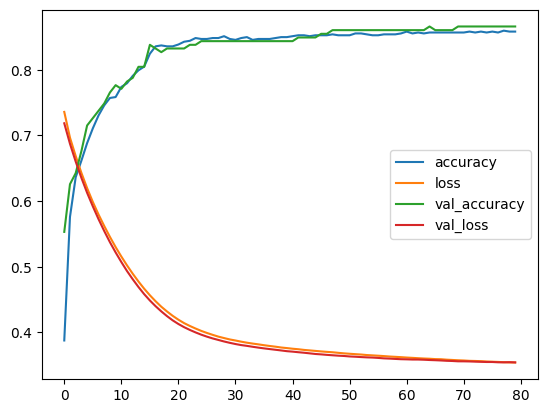

In [120]:

pd.DataFrame(hist.history).plot()

plt.show()


predict new sample 


In [121]:
new_sample = pd.read_csv('test.csv')
new_sample1 = pd.read_csv('test.csv')
new_sample

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [122]:
new_sample['age_fill'] = new_sample['Age'].fillna(new_sample['Age'].median())

In [123]:
new_sample['sex_encoded'] = encoder.fit_transform(new_sample['Sex'])

In [124]:
new_sample = new_sample.drop(columns=['Name','Ticket','Embarked','PassengerId','Sex','Age'])

In [125]:
new_sample

,Pclass,SibSp,Parch,Fare,Cabin,age_fill,sex_encoded
0,3,0,0,7.8292,NaN,34.5,1
1,3,1,0,7.0000,NaN,47.0,0
2,2,0,0,9.6875,NaN,62.0,1
3,3,0,0,8.6625,NaN,27.0,1
4,3,1,1,12.2875,NaN,22.0,0
...,...,...,...,...,...,...,...
413,3,0,0,8.0500,NaN,27.0,1
414,1,0,0,108.9000,C105,39.0,0
415,3,0,0,7.2500,NaN,38.5,1
416,3,0,0,8.0500,NaN,27.0,1


In [126]:
new_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   SibSp        418 non-null    int64  
 2   Parch        418 non-null    int64  
 3   Fare         417 non-null    float64
 4   Cabin        91 non-null     object 
 5   age_fill     418 non-null    float64
 6   sex_encoded  418 non-null    int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 21.4+ KB


In [127]:
new_sample['cabin_en']=tenc.fit_transform(new_sample['Cabin'],new_sample['Pclass'])
new_sample.drop(columns=['Cabin'], inplace=True)

In [128]:
new_sample=sc.fit_transform(new_sample)

In [129]:
predicion = model.predict(new_sample)
type(predicion)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


numpy.ndarray

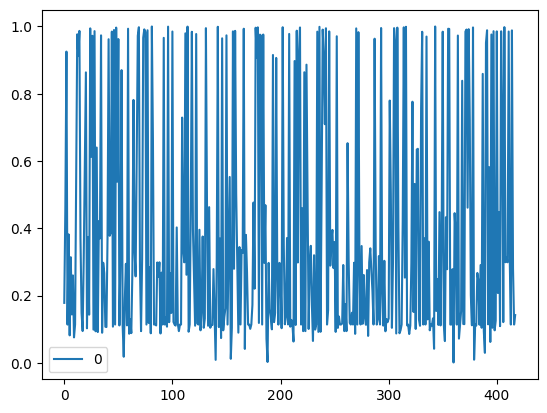

In [130]:
predicion1= pd.DataFrame(predicion).plot()

In [131]:
passenger_ids = new_sample1['PassengerId']

# Ensure prediction is a NumPy array
if isinstance(predicion, np.ndarray):
    # Convert to binary class (0 or 1)
    predicted_class = (predicion > 0.6).astype(int)

    # Create DataFrame
    final_df = pd.DataFrame(passenger_ids, columns=['PassengerId'])
    final_df['Survived'] = predicted_class.flatten()

    # Save to CSV
    final_df.to_csv("result1.csv", index=False)

    print("Prediction (probability):", predicion)
    print("Predicted class:", predicted_class)
else:
    print("Error: The prediction is not a NumPy array. Please check the model output.")

Prediction (probability): [[0.17833713]
 [0.4602105 ]
 [0.92513084]
 [0.11383911]
 [0.3818983 ]
 [0.08180396]
 [0.31409648]
 [0.14390393]
 [0.259979  ]
 [0.07573813]
 [0.11395072]
 [0.54000753]
 [0.97651005]
 [0.91188985]
 [0.9866376 ]
 [0.36914134]
 [0.14857112]
 [0.09459304]
 [0.30970523]
 [0.58984405]
 [0.8633685 ]
 [0.10271198]
 [0.37433398]
 [0.14325853]
 [0.9941595 ]
 [0.61256295]
 [0.9721438 ]
 [0.09884465]
 [0.98590785]
 [0.09391373]
 [0.63996375]
 [0.09162493]
 [0.42128146]
 [0.36999953]
 [0.9733725 ]
 [0.08954753]
 [0.29754403]
 [0.26685998]
 [0.10742751]
 [0.10649585]
 [0.36974236]
 [0.9618735 ]
 [0.3778087 ]
 [0.38727176]
 [0.98451364]
 [0.10764599]
 [0.989362  ]
 [0.11397196]
 [0.99644053]
 [0.53863096]
 [0.96236295]
 [0.11128964]
 [0.3255373 ]
 [0.870081  ]
 [0.11077593]
 [0.01823099]
 [0.18910393]
 [0.2944399 ]
 [0.11145844]
 [0.9931012 ]
 [0.08659265]
 [0.12930828]
 [0.08842299]
 [0.2756829 ]
 [0.7814877 ]
 [0.33052757]
 [0.25709024]
 [0.5993473 ]
 [0.9722447 ]
 [0.9975

In [132]:
type(predicted_class)

numpy.ndarray

<Axes: >

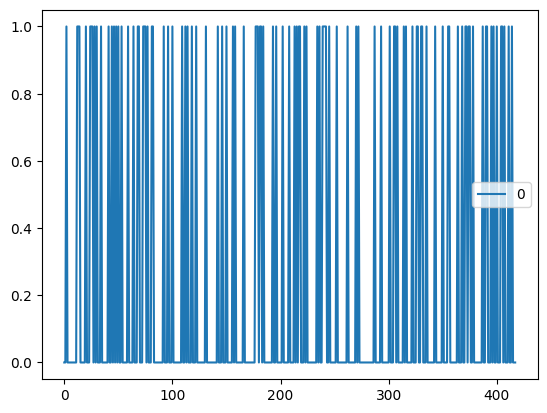

In [133]:
predicted_class1 =pd.DataFrame(predicted_class)
predicted_class1.plot()